<h1><center>CALIFORNIA HOUSE PRICE PREDICTION</center></h1>

# Business Understanding

Dataset: [data_california_house.csv](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

## Context

Dataset California Housing merupakan kumpulan data hasil survey kependudukan yang dilakukan pada tahun 1990 tentang hunian penduduk di seluruh California.

## Problem Statement

Memiliki rumah adalah impian setiap orang. Namun, kegiatan jual-beli rumah bukanlah hal yang mudah karena ada banyak hal yang perlu diperhatikan seperti harga pasaran rumah di sekitarnya. Mendapatkan rumah dengan harga terjangkau tentu akan menguntungkan bagi pembeli, namun ini akan merugikan penjual karena seharusnya rumah tersebut dapat bernilai lebih. Sedangkan menawarkan rumah dengan nilai yang berada jauh di atas harga pasaran akan membuat pembeli berpikir dua kali dan membuat proses jual-beli menjadi terhambat. Oleh sebab itu, penting sekali untuk mengetahui harga pasaran rumah di sebuah kawasan sebelum membutuskan untuk menjual atau membeli sebuah rumah.

## Goals

Memprediksi harga rumah di California berdasarkan kawasan perumahan di sekitarnya

## Analytical Approach

### Feature

Untuk dapat mengetahui harga pasaran sebuah rumah di California, maka setidaknya diperlukan informasi tentang:
1. Kawasan dan lingkungan:
  - Population
  - Households
  - Housing Median Age
  - Median Income
2. Kondisi rumah:
  - Longitude
  - Latitude
  - Ocean Proximity
  - Total Rooms
  - Total Bedrooms


### Modelling

Untuk memperkirakan harga rumah, maka teknik pemodelan yang akan diterapkan adalah regresi dengan model-model sebagai berikut:
1. Linear Regression
2. Decision Tree Regressor
3. KNN Regresser
4. Random Forest
5. XGBoost Regressor

### Metric Evaluation

Untuk mengevaluasi model yang dibuat, maka metric yang akan digunakan adalah:

1. RMSE: untuk mengukur standar deviasi residu dari hasil prediksi dengan nilai sebenrarnya
2. MAE: alternatif untuk data dengan banyak outlier di residu
3. RMSLE: pengukuran rmse dalam skala logaritmik karena rentang nilai prediksi nya besar, dalam skala ratusan ribu USD
4. MAPE: mengukur relative error dalam persen
5. R-Square: mengukur kemampuan model dalam menjelaskan hasil prediksi

# Data Understanding

Hal-hal yang tercakup di dalam tahap Data Understanding ini adalah:

1. Dataset Information & Cleansing -> Memeriksa kualitas dataset dan membersihkannya dari data kosong, data terduplikasi, atau penulisan data yang tidak benar
3. Exploratory Data Analysis -> Informasi yang terkandung di dalam dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# df = pd.read_csv('data_california_house.csv')
df = pd.read_csv('/content/drive/MyDrive/Purwadhika/Capstone Project Modul 3/data_california_house.csv').reset_index(drop=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


## Dataset Information & Cleansing

Untuk mengetahui profil dari dataset, seperti:
- Mengetahui variabel-variabel data yang terdapat di dalam nya
- Mengetahui tipe data dari setiap variabel
- Mengetahui seberapa banyak data null di dalam dataset
- Mengetahui apakah ada data yang terduplikasi di dalam dataset
- Mengetahui ragam nilai unik pada setiap variabel

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Dataset California Housing Prices merupakan data sensus perumahan di California pada tahun 1990 yang terdiri dari 10 kolom dan 14448 baris data, memuat informasi tentang:

1. longitude: Ukuran seberapa jauh lokasi perumahan dari barat; semakin tinggi nilai longitude maka lokasi rumah semakin ke timur.
2. latitude: Ukuran seberapa jauh lokasi perumahan dari utara; semakin tinggi nilai latitude maka lokasi rumah semakin ke selatan.
3. housing_median_age: Nilai rata-rata usia rumah dalam satu blok; semakin kecil nilai housing_median_age maka usia gedung semakin muda.
4. total_rooms: Jumlah total ruangan dalam satu blok.
5. total_bedrooms: Jumlah total kamar tidur dalam satu blok.
6. population: Jumlah total orang yang tinggal di dalam satu blok.
7. households: Jumlah total rumah tangga, sekelompok orang yang tinggal di dalam unit rumah, untuk satu blok.
8. median_income: Pendapatan rata-rata untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS).
9. median_house_value: Nilai rata-rata rumah tangga untuk rumah tangga dalam satu blok (diukur dalam Dolar AS).
10. ocean_proximity: Lokasi perumahan berdasarkan kedekatannya dari laut.

### Null Value in Dataset

In [5]:
n = df.isna().sum()
nnull = pd.concat([n,n/len(df)*100],axis=1,keys=['num','%'])
nnull

,num,%
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,137,0.948228
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
ocean_proximity,0,0.000000
median_house_value,0,0.000000


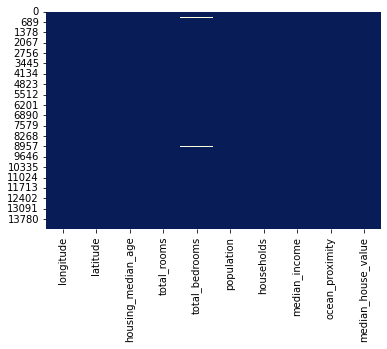

In [6]:
# Memeriksa sebaran data null
sns.heatmap(df.isnull(),cmap='YlGnBu_r',cbar=False);
plt.show()

Dari dataset data_california_house.csv null value ditemukan terdapat pada kolom total_bedrooms sebanyak 137 baris atau 0.95% dari dataset. Jumlah ini sangat kecil sehingga tidak ada perlakuan khusus yang perlu diberikan dan baris yang memiliki nilai kosong dapat dibuang saja dari dataset.

In [7]:
# Membuang baris dengan data null
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14306,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14307,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14308,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14309,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


### Duplicated Data

In [8]:
#Memeriksa banyak data yang terduplikat
df.duplicated().sum()

0

Tidak ditemukan data terduplikasi pada dataset.

### Unique Value in Each Variables

In [9]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,unique,uniqueSample
0,longitude,806,"[-122.69, -117.85]"
1,latitude,835,"[41.73, 39.7]"
2,housing_median_age,52,"[22.0, 20.0]"
3,total_rooms,5213,"[1657.0, 4850.0]"
4,total_bedrooms,1748,"[1089.0, 1395.0]"
5,population,3491,"[1155.0, 2006.0]"
6,households,1646,"[191.0, 815.0]"
7,median_income,9726,"[2.6065, 4.131]"
8,ocean_proximity,5,"[INLAND, ISLAND]"
9,median_house_value,3540,"[257500.0, 154400.0]"


## Exploratory Data Analysis

### Median House Value

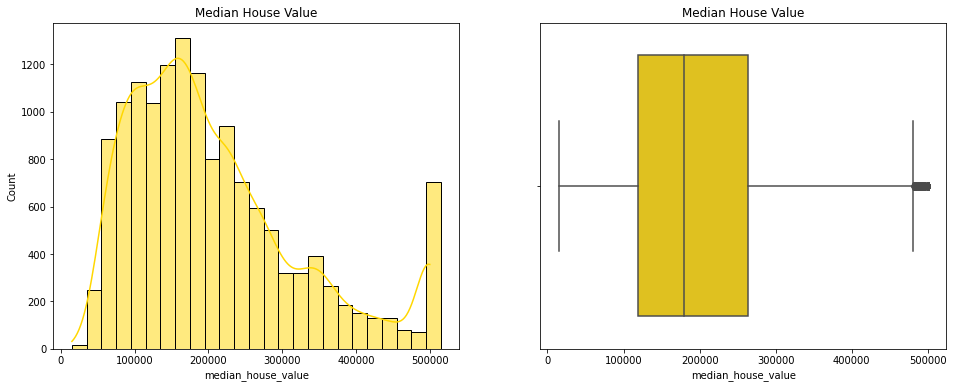

In [10]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(df['median_house_value'],binwidth=20000,kde=True,color='gold')
plt.title('Median House Value')

plt.subplot(1,2,2)
sns.boxplot(x= df['median_house_value'],color='gold')
plt.title('Median House Value')

plt.show()

Dari histogram plot di atas dapat dilihat bahwa data pada kolom median_house_value tidak terdistribusi normal dengan grafik yang miring ke kanan.

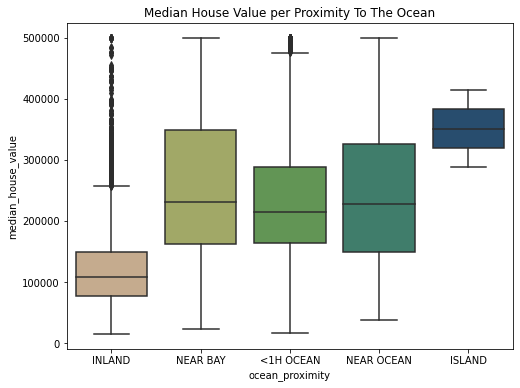

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='gist_earth_r')
plt.title('Median House Value per Proximity To The Ocean')
plt.show()

Ini disebabkan karena adanya outlier-outlier pada data, seperti pada rumah-rumah di daerah _INLAND_ dan _<1 H OCEAN_. Lebih lanjut, pemetaan rumah-rumah ini berdasarkan pada rata-rata harga nya adalah sebagai berikut:

In [12]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="median_house_value", color_continuous_scale=["#24459C","#1D90C0","#63C3BF","#CBEBB4","#F9FDCC"], title="House Location by Median Value", zoom=4, mapbox_style="carto-positron", width=1000, height=500)
fig.show()

Secara visual, rumah-rumah yang letaknya dekat dengan laut memiliki nilai yang relatif lebih tinggi dibandingkan dengan rumah-rumah yang jauh dari garis pantai. Sedangkan 

### About the Area

Berikut adalah analisa seputar area hunian di California.

In [13]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="ocean_proximity", size="population",color_discrete_sequence=["#C5AB8E","#A1A867","#629555","#407D6B","#284D6E"], title="Population Mapping", size_max=15 ,zoom=4, mapbox_style="carto-positron", width=1000, height=500)
fig.show()

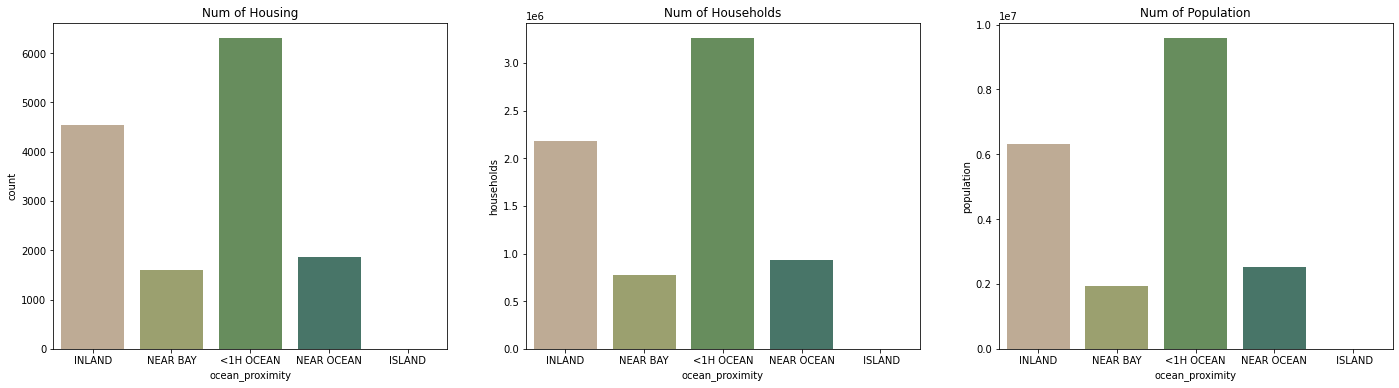

In [14]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.countplot(data=df, x='ocean_proximity', palette=["#C5AB8E","#A1A867","#629555","#407D6B","#284D6E"])
plt.title('Num of Housing')

plt.subplot(1,3,2)
data = df.groupby('ocean_proximity')['households'].sum().reset_index()
sns.barplot(data=data, x='ocean_proximity', y='households', palette=["#C5AB8E","#A1A867","#629555","#407D6B","#284D6E"], order=['INLAND','NEAR BAY','<1H OCEAN','NEAR OCEAN',' ISLAND'])
plt.title('Num of Households')

plt.subplot(1,3,3)
data = df.groupby('ocean_proximity')['population'].sum().reset_index()
sns.barplot(data=data, x='ocean_proximity', y='population', palette=["#C5AB8E","#A1A867","#629555","#407D6B","#284D6E"], order=['INLAND','NEAR BAY','<1H OCEAN','NEAR OCEAN',' ISLAND'])
plt.title('Num of Population')

plt.show()

Secara keseluruhan, jumlah total perumahan, rumah tangga, dan populasi di setiap kawasan saling berbanding lurus, yang jika diurutkan dari yang terbanyak ke paling sedikit, adalah sebagai berikut: <1H OCEAN -> INLAND -> NEAR OCEAN -> NEAR BAY -> ISLAND.

### About The Housing

Data pada kolom median_income yang berada dalam satuan puluhan ribu dolar dikonversi menjadi dolar dengan mengalikannya dengan 10000

In [15]:
df['median_income'] = df['median_income']*10000
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,19750.0,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,22604.0,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,62990.0,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,17199.0,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,22206.0,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14306,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,22375.0,INLAND,64300.0
14307,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,44125.0,INLAND,144600.0
14308,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,29135.0,INLAND,159400.0
14309,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,56315.0,<1H OCEAN,484600.0


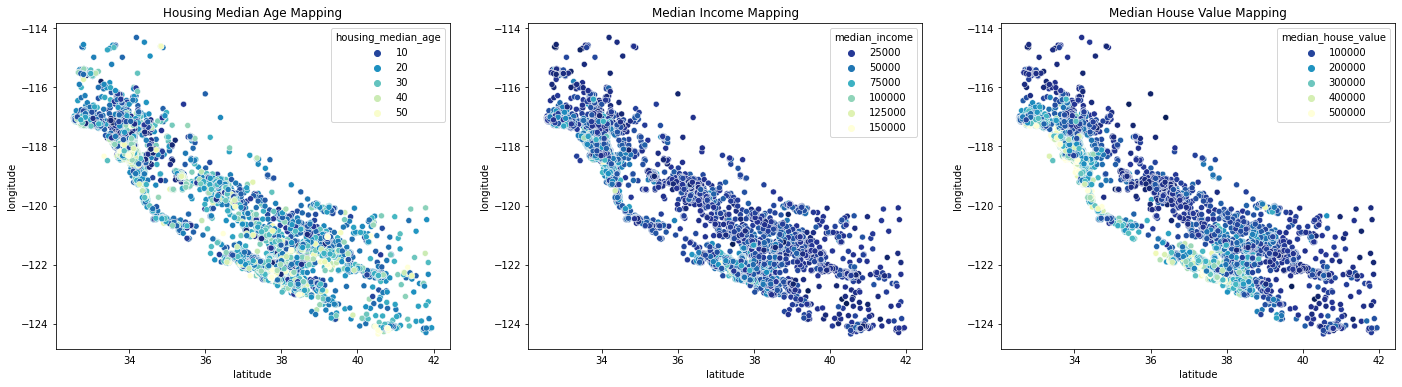

In [16]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.scatterplot(data=df,x='latitude',y='longitude',hue='housing_median_age',palette='YlGnBu_r',sizes=(10,100))
plt.title('Housing Median Age Mapping')

plt.subplot(1,3,2)
sns.scatterplot(data=df,x='latitude',y='longitude',hue='median_income',palette='YlGnBu_r',sizes=(10,100))
plt.title('Median Income Mapping')

plt.subplot(1,3,3)
sns.scatterplot(data=df,x='latitude',y='longitude',hue='median_house_value',palette='YlGnBu_r',sizes=(10,100))
plt.title('Median House Value Mapping')


plt.show()

Interpretation:

- Housing Median Age Mapping -> Pemetaan rata-rata usia bangunan hunian di California; Rentang rata-rata usia bangunan adalah 10-50 tahun yang tersebar di seluruh California.
- Median Income Mapping -> Pemetaan rata-rata pendapatan di suatu blok hunian; Pendapatan penduduk di daeah yang dekat dengan bibir pantai relatif lebih tinggi dibandingkan dengan penduduk yang tinggal jauh dari pantai.
- Median House Value Mapping -> Pemetaan rata-rata harga rumah dalam satu blok; Harga rumah di pesisir relatif lebih tinggi dibandingkan dengan rumah yang jauh dari pesisir.

### House Facility

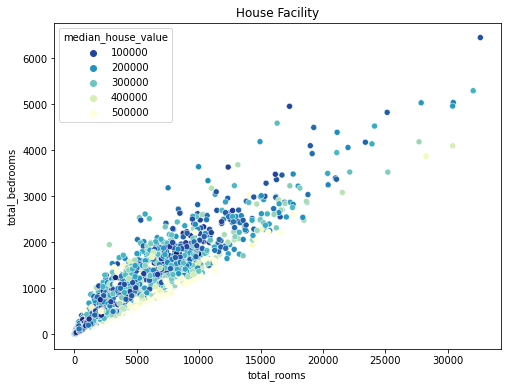

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='total_rooms',y='total_bedrooms',hue='median_house_value',palette='YlGnBu_r')
plt.title('House Facility')
plt.show()

Berdasarkan grafik scatterplot di atas, jumlah total ruang dan kamar tidur di dalam setiap blok perumahan tidak menunjukkan pola yang khas terhadap rata-rata harga rumah nya.

# MODEL 1: INCLUDED ALL FEATURES

## Data Preprocessing

In [18]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

### Add New Column to Dataset

Dengan asumsi bahwa 1 rumah tangga menempati 1 rumah, maka diperlukan kolom Rata-rata banyak kamar tidur per rumah dan Rata-rata banyak ruangan per rumah yang diperoleh dengan membagi total_bedrooms dan total_rooms dengan households.

1. Rata-rata banyak kamar tidur per rumah: total_bedrooms/households
2. Rata-rata banyak ruangan per rumah: total_rooms/households

In [19]:
#Membuat 2 kolom baru
df['avg_rooms_num'] = round(df['total_rooms']/df['households'])
df['avg_bedrooms_num'] = round(df['total_bedrooms']/df['households'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_num,avg_bedrooms_num
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,19750.0,INLAND,47500.0,3.0,1.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,22604.0,NEAR BAY,100000.0,4.0,1.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,62990.0,<1H OCEAN,285800.0,6.0,1.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,17199.0,<1H OCEAN,175000.0,3.0,1.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,22206.0,INLAND,59200.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14306,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,22375.0,INLAND,64300.0,5.0,1.0
14307,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,44125.0,INLAND,144600.0,6.0,1.0
14308,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,29135.0,INLAND,159400.0,5.0,1.0
14309,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,56315.0,<1H OCEAN,484600.0,5.0,1.0


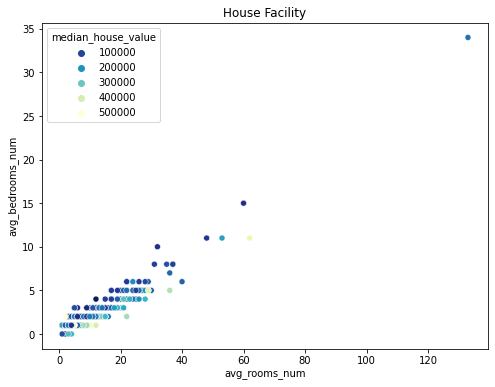

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='avg_rooms_num',y='avg_bedrooms_num',hue='median_house_value',palette='YlGnBu_r')
plt.title('House Facility')
plt.show()

### Dataset Filtering

Filtering dilakukan untuk menyeleksi dataset dari outlier-outlier pada kolom median_house_value dengan menerapkan treshold pada Q3.

In [21]:
#Menentukan batas ambang filter
q1 = np.percentile(df['median_house_value'], 25)
q3 = np.percentile(df['median_house_value'], 75)
iqr = q3-q1
tresh = q3 + 1.5*iqr
tresh

480275.0

In [22]:
#Menyaring data dengan median_house_value di atas batas ambang
data = df[df['median_house_value'] < tresh]
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_num,avg_bedrooms_num
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,19750.0,INLAND,47500.0,3.0,1.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,22604.0,NEAR BAY,100000.0,4.0,1.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,62990.0,<1H OCEAN,285800.0,6.0,1.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,17199.0,<1H OCEAN,175000.0,3.0,1.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,22206.0,INLAND,59200.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14305,-117.10,32.73,24.0,2927.0,704.0,2005.0,668.0,22375.0,NEAR OCEAN,102900.0,4.0,1.0
14306,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,22375.0,INLAND,64300.0,5.0,1.0
14307,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,44125.0,INLAND,144600.0,6.0,1.0
14308,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,29135.0,INLAND,159400.0,5.0,1.0


Selain itu, dari proses eksplorasi dataset juga telah diketahui bahwa data dengan kategori 'ISLAND' pada kolom ocean_proximity hanya berjumlah 2. Sementara jumlah ini terlalu sedikit untuk proses training, validation, dan testing sehingga 2 baris data tersebut perlu dikeluarkan dari proses dataset.

In [23]:
# Menghapus data dengan 'ocean_proximity' == 'ISLAND'
data = data[data['ocean_proximity'] != 'ISLAND']
data['ocean_proximity'].value_counts()

<1H OCEAN     5891
INLAND        4526
NEAR OCEAN    1689
NEAR BAY      1452
Name: ocean_proximity, dtype: int64

Dengan demikian, dataset telah bersih dan siap untuk dimodelkan

In [24]:
data.reset_index(drop=True,inplace=True)
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms_num,avg_bedrooms_num
count,13558.000000,13558.000000,13558.000000,13558.000000,13558.000000,13558.000000,13558.000000,13558.000000,13558.000000,13558.000000,13558.000000
mean,-119.558601,35.653011,28.315828,2623.244800,540.394527,1441.897035,501.395191,36571.595294,190578.411049,5.355510,1.045434
std,2.008189,2.154867,12.503901,2195.431297,425.991868,1164.529602,385.762278,15436.800523,95164.470024,2.328937,0.467425
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,4999.000000,14999.000000,1.000000,0.000000
25%,-121.757500,33.930000,18.000000,1441.250000,296.000000,794.000000,281.000000,25238.000000,116200.000000,4.000000,1.000000
50%,-118.500000,34.270000,28.000000,2109.500000,437.000000,1181.000000,411.000000,34479.500000,173300.000000,5.000000,1.000000
75%,-117.990000,37.730000,37.000000,3119.750000,649.000000,1742.750000,606.000000,45622.500000,245975.000000,6.000000,1.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,150001.000000,480100.000000,133.000000,34.000000


### Dataset Splitting

In [25]:
x = data.drop(columns=['median_house_value'])
y = data['median_house_value']

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

### Dataset Transformation

Encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ('encoder_onehot', OneHotEncoder(handle_unknown = 'ignore'), ['ocean_proximity']),
], remainder='passthrough')

Scaling

In [28]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

## Modelling

### Benchmark Models

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=10)
rf = RandomForestRegressor(random_state=10)
xgb = XGBRegressor(random_state=10,objective ='reg:squarederror')

#### Training and Validation

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

models = [lr,knn,dt,rf,xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=10)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    # print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    # print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    # print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

#### Model Selection

In [31]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-59482.290744,1685.292121,-43949.503391,782.580998,-0.270989,0.005613
1,KNN Regressor,-56870.786304,1233.530786,-40303.402287,712.450592,-0.236464,0.002076
2,DecisionTree Regressor,-65625.397806,1338.040660,-44032.326147,935.166589,-0.258826,0.011886
3,RandomForest Regressor,-46046.793999,1194.393099,-31478.119266,494.216752,-0.188173,0.004113
4,XGBoost Regressor,-49722.094625,1093.569978,-35460.133524,569.225699,-0.212370,0.003006


- Berdasarkan rata-rata dan standar deviasi skor RMSE, MAE, dan MAPE, secara berurutan, model yang menunjukkan performa paling baik adalah **Random Forest, XGBoost, dan KNN**

Oleh sebab itu, performa ketiga model ini akan dibandingkan secara lebih lanjut pada prediksi dataset x_test.

#### Prediction

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

# Benchmark 3 model terbaik
models = {
    'RandomForest': RandomForestRegressor(random_state=10),
    'XGBoost': XGBRegressor(random_state=10,objective ='reg:squarederror'),
    'KNN' : KNeighborsRegressor()
}

score_rmse = []
score_mae = []
score_rmsle = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_rmsle.append(mean_squared_log_error(y_test, y_pred, squared=False))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae,'RMSLE': score_rmsle, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,RMSLE,MAPE
RandomForest,43257.705603,29912.877212,0.230293,0.177161
XGBoost,48542.010114,35126.593315,0.261693,0.211702
KNN,55563.793582,39663.436578,0.292013,0.234035


Hasil prediksi dengan dataset uji menunjukkan bahwa **Random Forest** lebih unggul dalam memprediksi nilai rumah di California dengan skor evaluasi metrik sebagai berikut:
- RMSE = 43,257 => rata-rata nilai error antara skor prediksi dengan skor sebenarnya adalah 43,257 USD.
- MAE = 29,912 => rata-rata absolut error skor prediksinya adalah 29,912 USD.
- RMSLE = 0.230 => rata-rata eror skor prediksi dari skor sebenarnya dalam skala logaritmik adalah 0.23.
- MAPE = 0.177 => rata-rata eror skor prediksi dari skor sebenarnya dalam persentase adalah 0.177%.

In [33]:
rf = RandomForestRegressor(random_state=10)

score_rmse = []
score_mae = []
score_rmsle = []
score_mape = []

# Prediksi pada test set
rf_bench = Pipeline([
  ('preprocessing', transformer),
  ('scaler', scaler),
  ('model', rf)
])

rf_bench.fit(x_train, y_train)
y_pred = rf_bench.predict(x_test)
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_rmsle.append(mean_squared_log_error(y_test, y_pred,squared=False))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning_rf = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape})
score_before_tuning_rf


,RMSE,MAE,MAPE
0,43257.705603,29912.877212,0.177161


In [34]:
rf_bench.score(x_test,y_test)

0.7899833594382292

Interpretasi: Secara keseluruhan model benchmark Random Forest ini dapat mewakili 78,99% data.

### Tuning Model

#### Training and Validation

Untuk meningkatkan performa model yang ingin dibuat, maka tuning model dilakukan untuk RandomForest karena berdasarkan skor evaluasi prediksinya pemodelan dengan RandomForest dapat menggungguli XGBoost dan KNN.

In [35]:
from sklearn.model_selection import RandomizedSearchCV

#Hyperparameter tuning
hyperparam_rf = {
    'model__criterion': ['squared_error', 'absolute_error', 'poisson'],       #The function to measure the quality of a split
    'model__max_features': list(np.arange(2, 12, 1)),                         #The number of features to consider when looking for the best split
    'model__n_estimators': list(np.arange(100, 200, 1)),                      #The number of trees in the forest
    'model__min_samples_split': list(np.arange(2, 11, 1)),                    #The minimum number of samples required to split an internal node
}

crossval = KFold(n_splits=5,shuffle=True,random_state=10)

estimator = Pipeline([
    ('preprocessing',transformer),
    ('scaler',scaler),
    ('model',RandomForestRegressor(random_state=10))
])

random_rf = RandomizedSearchCV(
    estimator,
    param_distributions = hyperparam_rf,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error', # Hanya bisa memilih salah stau metric untuk optimisasi,
    n_iter=25,
    random_state = 10
)

random_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('encoder_onehot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              RandomForestRegressor(random_state=10))]),
                   n_iter=25, n_jobs=-1,
                   para...
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
         

In [36]:
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__max_features,param_model__criterion,params,split0_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,7.611207,1.092351,0.158507,0.053103,148,4,8,squared_error,"{'model__n_estimators': 148, 'model__min_sampl...",-45469.990621,...,605.501435,4,-0.190859,-0.185509,-0.182878,-0.190716,-0.184139,-0.186820,0.003345,4
1,12.462787,1.007946,0.249026,0.089655,193,2,10,squared_error,"{'model__n_estimators': 193, 'model__min_sampl...",-45837.758907,...,629.458633,3,-0.191116,-0.184676,-0.181887,-0.191369,-0.183148,-0.186439,0.004021,2
23,11.481036,0.057579,0.208449,0.007517,190,2,10,squared_error,"{'model__n_estimators': 190, 'model__min_sampl...",-45847.037562,...,636.503691,1,-0.191182,-0.184691,-0.181855,-0.191277,-0.183151,-0.186431,0.004019,1
3,11.594902,0.090407,0.197758,0.010503,191,2,10,squared_error,"{'model__n_estimators': 191, 'model__min_sampl...",-45859.046334,...,634.541779,2,-0.191192,-0.184661,-0.181849,-0.191332,-0.183179,-0.186443,0.004034,3
15,346.700470,3.508169,0.146411,0.005412,180,6,9,absolute_error,"{'model__n_estimators': 180, 'model__min_sampl...",-45968.932584,...,604.626899,7,-0.193456,-0.186996,-0.185256,-0.191117,-0.187378,-0.188841,0.002996,8


In [37]:
print('Random Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: -0.18643111560820294
Best_params: {'model__n_estimators': 190, 'model__min_samples_split': 2, 'model__max_features': 10, 'model__criterion': 'squared_error'}


In [38]:
random_rf.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ocean_proximity'])])),
                ('scaler', RobustScaler()),
                ('model',
                 RandomForestRegressor(max_features=10, n_estimators=190,
                                       random_state=10))])

#### Prediction

In [39]:
model = {'RandomForest': RandomForestRegressor(random_state=10)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

rf_tuning.fit(x_train, y_train)

y_pred_rf_tuning = rf_tuning.predict(x_test)

# Skor RMSE, MAE, RMSLE, dan MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
rmsle_rf_tuning = mean_squared_log_error(y_test, y_pred_rf_tuning,squared=False)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'RMSLE': rmsle_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning_rf

,RMSE,MAE,RMSLE,MAPE
RandomForest,43076.439515,29712.262661,0.228751,0.176077


In [40]:
#Skor R-Square setelah tuning
rf_tuning.score(x_test,y_test)

0.7917397694383788

Interpretasi: Setelah dilakukan tuning, model Random Forest dengan parameter:
- criterion='squared_error', 
- max_features=10, 
- min_samples_split=2, 
- n_estimators=190, 
- random_state=10

meningkatkan skore R-Square menjadi 79.12% dari sebelumnya 78.99%.

## Evaluation

### Comparison of Benchmark VS Tuned Model

Evaluasi model yang dibangun dilakukan dengan membandingkan metrik hasil prediksi benchmark model dengan model yang sudah dituning.

In [41]:
#Benchmark Model
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE,RMSLE,MAPE
RandomForest,43257.705603,29912.877212,0.230293,0.177161


In [42]:
#Tuned Model
score_after_tuning_rf

,RMSE,MAE,RMSLE,MAPE
RandomForest,43076.439515,29712.262661,0.228751,0.176077


Jika dibandingkan, maka perubahan skor metrik model setelah proses tuning adalah sebagai berikut:
- RMSE: 43,257 => 43,076 (-181)
- MAE: 29,912 => 29,712 (-200)
- RMSLE: 0.230 => 0.228 (-0.002)
- MAPE: 0.177 => 0.176 (-0.001)
- R-Square: 0.789 => 0.792 (+0.003)

#### Actual VS Prediction Plot

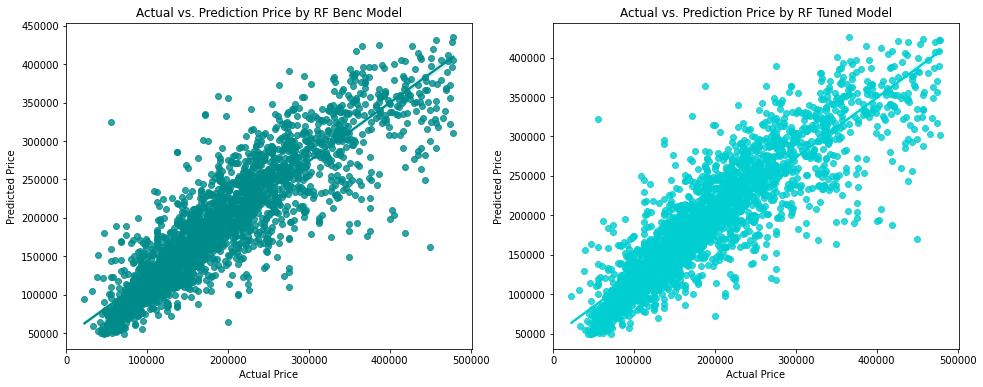

In [43]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
sns.regplot(x=y_test, y=y_pred,color='darkcyan')
plt.title('Actual vs. Prediction Price by RF Benc Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_pred_rf_tuning,color='darkturquoise')
plt.title('Actual vs. Prediction Price by RF Tuned Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

#### Residual Plot

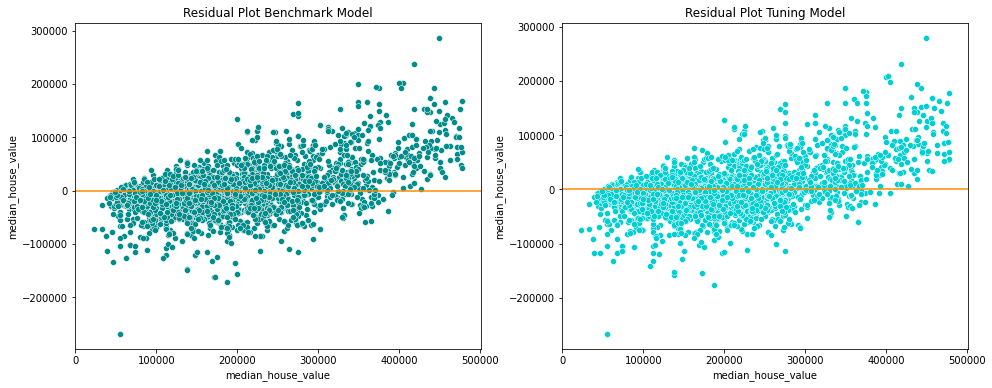

In [44]:
residual_bench = y_test-y_pred
residual_tuned = y_test-y_pred_rf_tuning

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test,y=residual_bench,color='darkcyan')
plt.axhline(y = 0,color='darkorange')
plt.title('Residual Plot Benchmark Model')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=residual_tuned,color='darkturquoise')
plt.axhline(y = 0,color='darkorange')
plt.title('Residual Plot Tuning Model')
plt.show()

Plot residu hasil prediksi dengan nilai sebenarnya tidak mengilustrasikan sebuah pola yang khusus, akan tetapi, dapat dilihat bahwa semakin tinggi nilai median house value maka residu nya juga semakin tinggi.

### Feature Importance

Fitur importance merupakan salah satu cara untuk mengevaluasi signifikansi fitur dalam memprediksi nilai median_house_value oleh model yang terpilih.

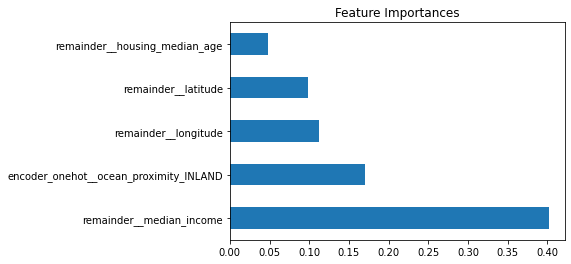

In [45]:
#Memeriksa kepentingan fitur dalam pemodelan
feature_imp = pd.Series(rf_tuning['model'].feature_importances_, transformer.get_feature_names_out ()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

Dari grafik diatas dapat dilihat bahwa, median_income memiliki signifikansi yang paling tinggi di dalam model dengan skor hampir mendekati 0.40, diikuti oleh ocean_proximity_INLAND dengan skor 0.15, lalu, longitude, latitude, dan housing_median_age.



# MODEL 2: FEATURES REDUCED

Pengurangan fitur adalah salah satu upaya yang dapat dilakukan untuk meningkatkan performa suatu model. Dalam studi kasus ini, pemilihan fitur dilakukan berdasarkan:

1. Feature Importance
2. Feature Correlation
3. Features Multicolinearity

## Data Prepocessing

### Feature Selection

#### Feature Correlation

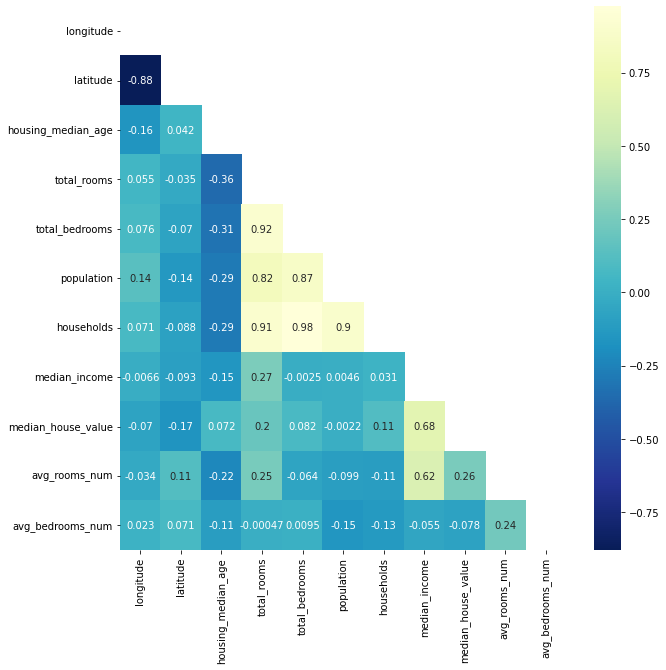

In [46]:
#Mengevaluasi korelasi fitur
plt.figure(figsize=(10,10))
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data = corr,cmap='YlGnBu_r',mask=mask,annot=True)
plt.show()

Dari uji korelasi diketahui bahwa fitur yang menunjukkan korelasi paling kuat dengan median_house_value adalah median_income dengan skor korelasi 0.68. Sedangkan korelasi avg_rooms_num dan total_rooms yang berada di urutan kedua dan ketiga tergolong lemah dengan skor 0.26 dan 0.20.

#### Multicollinearity

In [47]:
#Memeriksa multikolinearitas antar fitur
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(data.drop(columns=['ocean_proximity','median_house_value']))


,variables,VIF
0,longitude,643.647622
1,latitude,563.790459
2,housing_median_age,7.523024
3,total_rooms,41.916761
4,total_bedrooms,109.180323
5,population,15.800670
6,households,109.420790
7,median_income,13.586140
8,avg_rooms_num,51.556122
9,avg_bedrooms_num,38.249549


Pemeriksaan multikolinearitas antar variabel independent menunjukkan bahwa semua variabel memiliki keterkaitan satu sama lain, namun housing_median_age masih berada dalam rentang skor yang tidak terlalu berbahaya.

Kesimpulan:

1. Feature Importance > 0.1 => median_income, ocean_proximity, longitude, latitude
2. Feature Correlation > 0.2 => median_income, avg_rooms_num
3. Features Multicolinearity <10 => housing_median_age

Dengan demikian, maka fitur-fitur yang selanjutnya akan dilatih untuk memprediksi nilai median_house_value adalah:

- longitude, 
- latitude,
- housing_median_age
- median_income, 
- ocean_proximity, 
- avg_rooms_num,


### Data Splitting

In [48]:
x_opt = data[['longitude','latitude','housing_median_age','median_income','ocean_proximity','avg_rooms_num']] #Fitur yang terseleksi
y_opt = data['median_house_value']

In [49]:
from sklearn.model_selection import train_test_split

x_train_opt,x_test_opt,y_train_opt,y_test_opt = train_test_split(x_opt,y_opt,test_size=0.2,random_state=10)

## Modelling

In [50]:
rmse_rf_bench_opt = []
mae_rf_bench_opt = []
rmsle_rf_bench_opt = []
mape_rf_bench_opt = []

# Prediksi pada test set
rf_bench_opt = Pipeline([
  ('preprocessing', transformer),
  ('scaler', scaler),
  ('model', RandomForestRegressor(random_state=10))
])

rf_bench_opt.fit(x_train_opt, y_train_opt)
y_pred_rf_bench_opt = rf_bench_opt.predict(x_test_opt)

#Skor metrik RMSE, MAE, RMSLE, dan MAPE
rmse_rf_bench_opt.append(np.sqrt(mean_squared_error(y_test_opt, y_pred_rf_bench_opt)))
mae_rf_bench_opt.append(mean_absolute_error(y_test_opt, y_pred_rf_bench_opt))
rmsle_rf_bench_opt.append(mean_squared_log_error(y_test_opt, y_pred_rf_bench_opt,squared=False))
mape_rf_bench_opt.append(mean_absolute_percentage_error(y_test_opt, y_pred_rf_bench_opt))

score_before_tuning_rf_opt = pd.DataFrame({'RMSE': rmse_rf_bench_opt, 'MAE': mae_rf_bench_opt,'RMSLE': rmsle_rf_bench_opt, 'MAPE': mape_rf_bench_opt})
score_before_tuning_rf_opt

,RMSE,MAE,RMSLE,MAPE
0,43092.813741,29294.692928,0.2283,0.172431


In [51]:
#Skor R-Square sebelum tuning
rf_bench_opt.score(x_test_opt,y_test_opt)

0.7915814114988924

#### Training and Validation

In [52]:
#Hyperparameter model
hyperparam_rf = {
    'model__criterion': ['squared_error', 'absolute_error', 'poisson'],        #The function to measure the quality of a split
    'model__max_features': list(np.arange(2, 10, 1)),                          #The number of features to consider when looking for the best split
    'model__n_estimators': list(np.arange(100, 200, 1)),                       #The number of trees in the forest
    'model__min_samples_split': list(np.arange(2, 11, 1)),                     #The minimum number of samples required to split an internal node
}

crossval = KFold(n_splits=5,shuffle=True,random_state=10)

estimator = Pipeline([
    ('preprocessing',transformer),
    ('scaler',scaler),
    ('model',RandomForestRegressor(random_state=10))
])

random_rf_opt = RandomizedSearchCV(
    estimator,
    param_distributions = hyperparam_rf,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error', # Hanya bisa memilih salah stau metric untuk optimisasi,
    n_iter=25,
    random_state = 10
)

random_rf_opt.fit(x_train_opt, y_train_opt)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('encoder_onehot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              RandomForestRegressor(random_state=10))]),
                   n_iter=25, n_jobs=-1,
                   para...
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
         

In [53]:
print('Random Forest')
print('Best_score:', random_rf_opt.best_score_)
print('Best_params:', random_rf_opt.best_params_)

Random Forest
Best_score: -0.1806778397911668
Best_params: {'model__n_estimators': 129, 'model__min_samples_split': 5, 'model__max_features': 7, 'model__criterion': 'squared_error'}


#### Prediction

In [54]:
model = {'RandomForest Opt': RandomForestRegressor(random_state=10)}

# Define model terhadap estimator terbaik
rf_tuning_opt = random_rf_opt.best_estimator_

rf_tuning_opt.fit(x_train_opt, y_train_opt)
y_pred_rf_tuning_opt = rf_tuning_opt.predict(x_test_opt)

# Skor metrik RMSE, MAE, RMSLE & MAPE setelah tuning
rmse_rf_tuning_opt = np.sqrt(mean_squared_error(y_test_opt, y_pred_rf_tuning_opt))
mae_rf_tuning_opt = mean_absolute_error(y_test_opt, y_pred_rf_tuning_opt)
rmsle_rf_tuning_opt = mean_squared_log_error(y_test_opt, y_pred_rf_tuning_opt,squared=False)
mape_rf_tuning_opt = mean_absolute_percentage_error(y_test_opt, y_pred_rf_tuning_opt)

score_after_tuning_rf_opt = pd.DataFrame({'RMSE': rmse_rf_tuning_opt, 'MAE': mae_rf_tuning_opt, 'RMSLE': rmsle_rf_tuning_opt, 'MAPE': mape_rf_tuning_opt}, index=model.keys())
score_after_tuning_rf_opt

,RMSE,MAE,RMSLE,MAPE
RandomForest Opt,42755.471612,29158.989254,0.225643,0.171011


In [55]:
#Skor R-Square setelah tuning
rf_tuning_opt.score(x_test_opt,y_test_opt)

0.7948317526950424

## Evaluation

In [56]:
#Tuned Model with All Features
score_after_tuning_rf

,RMSE,MAE,RMSLE,MAPE
RandomForest,43076.439515,29712.262661,0.228751,0.176077


In [57]:
#Tuned Model with Features Reduced
score_after_tuning_rf_opt

,RMSE,MAE,RMSLE,MAPE
RandomForest Opt,42755.471612,29158.989254,0.225643,0.171011


Pengurangan fitur untuk prediksi skor median_house_value dari dataset California Housing dapat meningkatkan kinerja model, yang ditunjukkan oleh penurunan skor metrik RMSE, MAE, dan MAPE:
- RMSE: 43,076 => 42,755 (-321)
- MAE: 29,712 =>29,158 (-554)
- RMSLE: 0.229 => 0.226 (-0.003)
- MAPE: 0.176 => 0.171 (-0.005)
- R-Squared: 0.792 => 0.795 (+0.003)

### Actual vs Prediction Plot

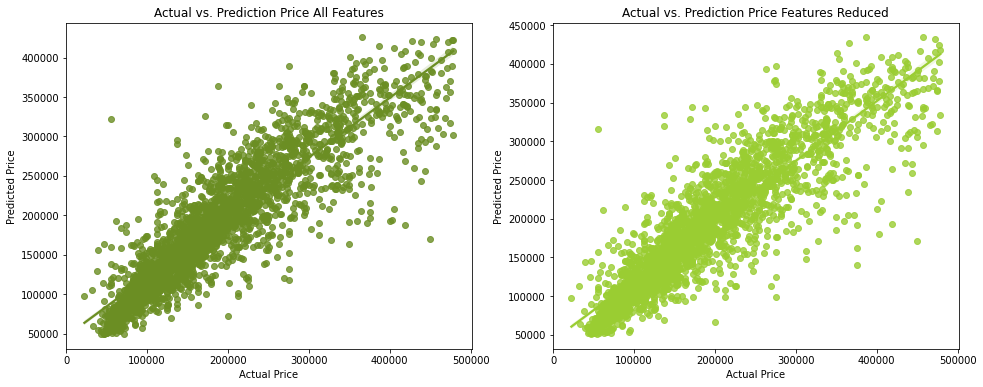

In [58]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
sns.regplot(x=y_test, y=y_pred_rf_tuning,color='olivedrab')
plt.title('Actual vs. Prediction Price All Features')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(1,2,2)
sns.regplot(x=y_test_opt, y=y_pred_rf_tuning_opt,color='yellowgreen')
plt.title('Actual vs. Prediction Price Features Reduced')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

### Residual Plot

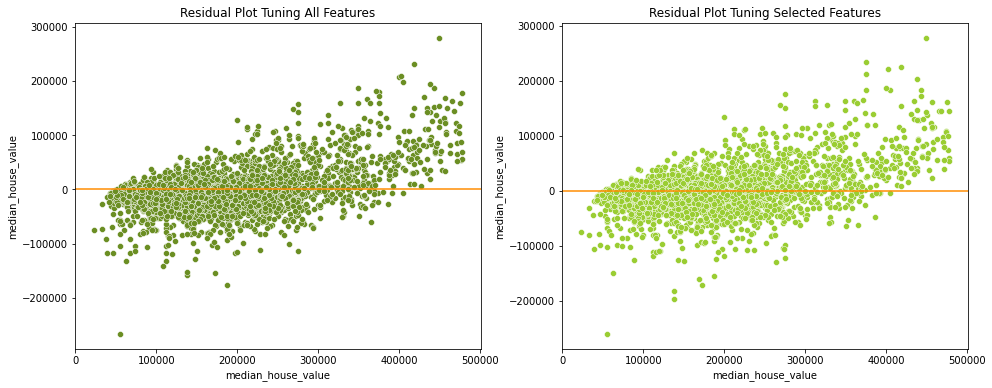

In [59]:
residual_tuned_all = y_test-y_pred_rf_tuning
residual_tuned_red = y_test-y_pred_rf_tuning_opt

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test,y=residual_tuned_all,color='olivedrab')
plt.axhline(y = 0,color='darkorange')
plt.title('Residual Plot Tuning All Features')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=residual_tuned_red,color='yellowgreen')
plt.axhline(y = 0,color='darkorange')
plt.title('Residual Plot Tuning Selected Features')
plt.show()

Meskipun ada peningkatan kinerja pada model dengan fitur yang sudah diseleksi, namun peningkatan ini masih tidak begitu signifikan untuk dapat terlihat secara visual di plot hasil prediksi dengan nilai sebenarnya, serta plot residunya.

# Conclusion

Maka dapat disimpulkan bahwa:

1. Diantara 4 model regresi yang diujikan, **Random Forest** adalah algoritma pemodelan yang paling baik dalam memprediksi nilai rumah dari dataset *california_housing_price.csv*
2. Fitur yang paling berpengaruh dalam menentukan prediksi harga rumah adalah rata-rata pendapatan rumah tangga dalam suatu kawasan yang disimpan dalam kolom **median_income**
3. Model **RandomForestRegressor('model__n_estimators': 129, 'model__min_samples_split': 5, 'model__max_features': 7, 'model__criterion': 'squared_error')** dapat memprediksi nilai rumah di California.
4. Meskipun model yang dibangun sudah cukup baik dalam melakukan prediksi, yang dibuktikan dengan skor r-square = 0.795, namun masih diperlukan optimalisasi lebih lanjut karena rataan (rmse, mae, rmsle) dan persentase (mape) erornya masih cukup besar, dengan rataan eror >20.000 USD dan >15% nilai sebenarnya

# Recommendation

Berikut adalah rekomendasi untuk pengembangan model selanjutnya:

1. Melakukan evaluasi fitur yang digunakan secara lebih lanjut, misal dengan menerapkan **iterative-feature-selection**
2. Meningkatkan **kompleksitas model**, dengan menambahkan parameter pada saat tuning atau menggunakan algoritma yang lebih canggih

# Reference

- dataset: https://www.kaggle.com/datasets/camnugent/california-housing-prices
- code: https://github.com/fadhqalbi/capstone-project-modul-3.git
- video explanation: 